In [1]:
import pandas as pd
from pykalman import KalmanFilter
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
mtchCointTest = pd.read_csv("./data/MTCH_scores_8_26.csv")

In [3]:
mtchCointTest.head(15)

,Ticker 1,Ticker 2,Cointegration Score,P Value
0,MTCH,HUGE,-5.242626,0.000058
1,MTCH,AMGN,-4.758614,0.000446
2,MTCH,VERO,-4.689063,0.000589
3,MTCH,TEVA,-4.609464,0.000805
4,MTCH,ASML,-4.510857,0.001175
5,MTCH,TTI,-4.482067,0.001310
6,MTCH,G,-4.453310,0.001460
7,MTCH,MODN,-4.420720,0.001648
8,MTCH,AJG,-4.373196,0.001964
9,MTCH,NSSC,-4.314291,0.002432


In [4]:
mtchCointTest.tail()

,Ticker 1,Ticker 2,Cointegration Score,P Value
3071,MTCH,CRUS,-1.459549,0.776374
3072,MTCH,ZNGA,-1.417337,0.791509
3073,MTCH,AUDC,-1.411548,0.793527
3074,MTCH,SE,-1.309961,0.826710
3075,MTCH,NOW,-1.214809,0.853980


In [26]:
mtchPast = yf.download("MTCH", interval='1h', start='2020-08-26', end='2020-09-26')
amgnPast = yf.download("AMGN", interval='1h', start='2020-08-26', end='2020-09-26')
nowPast = yf.download("NOW", interval='1h', start='2020-08-26', end='2020-09-26')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
mtchCurrent = yf.download("MTCH", interval='1h', start='2020-09-26', end='2020-10-26')
amgnCurrent = yf.download("AMGN", interval='1h', start='2020-09-26', end='2020-10-26')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


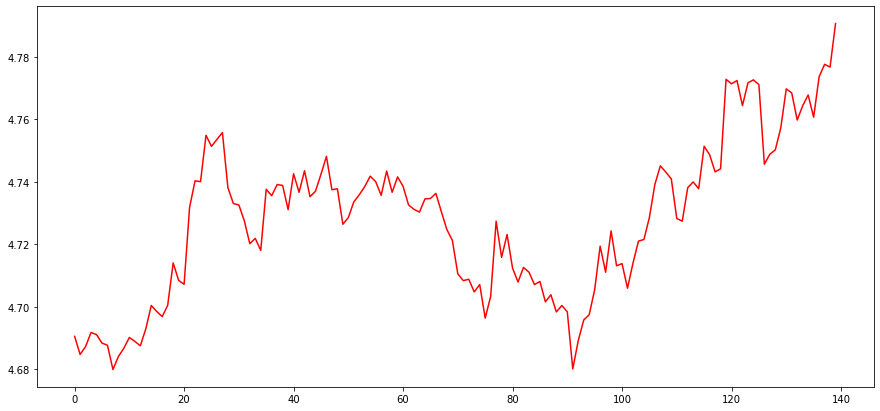

In [24]:
plt.figure(figsize=(15, 7))
plt.plot(np.log(mtchCurrent['Close'].values), c='r')

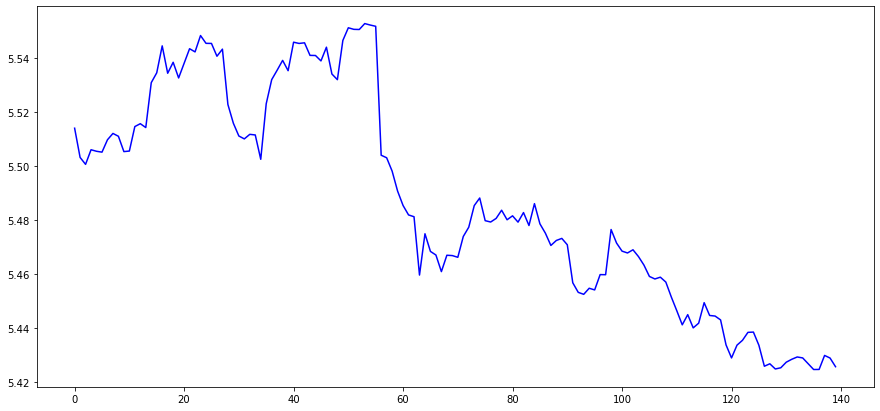

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(np.log(amgnCurrent['Close'].values), c='b')

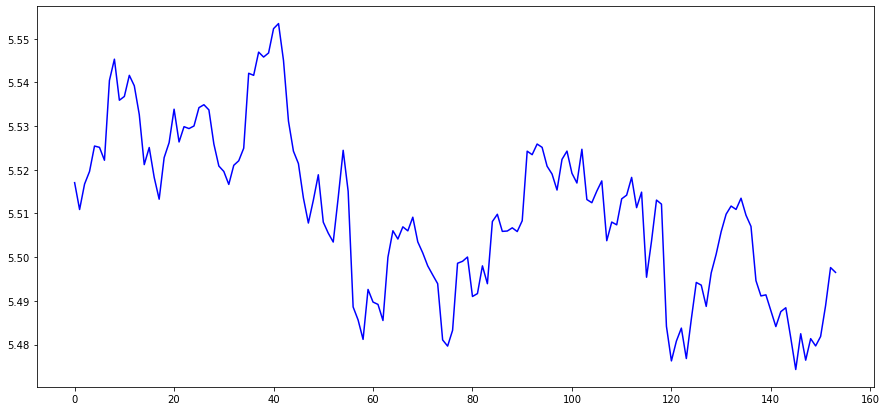

In [25]:
plt.figure(figsize=(15, 7))
plt.plot(np.log(amgnPast['Close'].values), c='b')

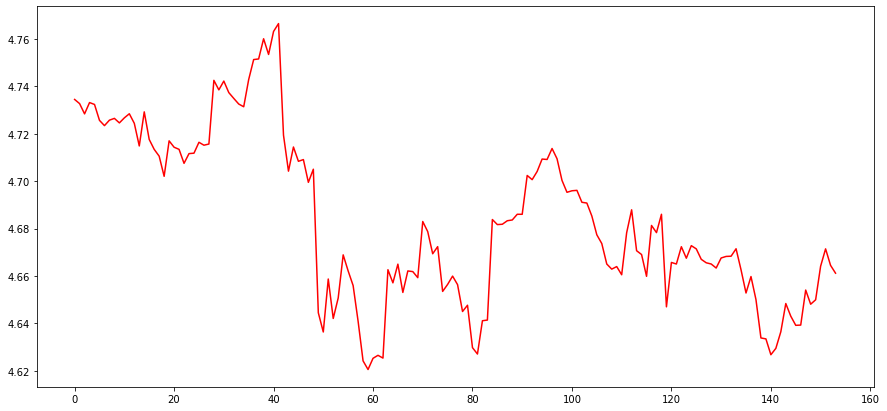

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(np.log(mtchPast['Close'].values), c='r')

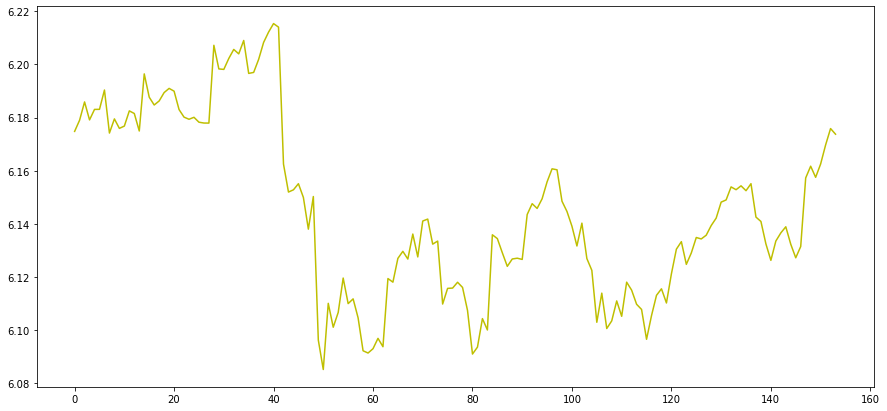

In [27]:
plt.figure(figsize=(15, 7))
plt.plot(np.log(nowPast['Close'].values), c='y')

In [9]:
obs_mat = sm.add_constant(np.log(amgnCurrent['Close'].values), prepend=False)[:, np.newaxis]
kf = KalmanFilter(n_dim_obs = 1, n_dim_state = 2,
                  initial_state_mean = np.ones(2),
                  initial_state_covariance = np.ones((2,2)),
                  transition_matrices = np.eye(2), 
                  observation_matrices = obs_mat,
                  observation_covariance = 0.5,
                  transition_covariance= 0.005*np.eye(2))

In [10]:
state_means, state_covs = kf.filter(np.log(mtchCurrent['Close'].values))
slope=state_means[:, 0] 
intercept=state_means[:, 1]

Text(0, 0.5, 'intercept')

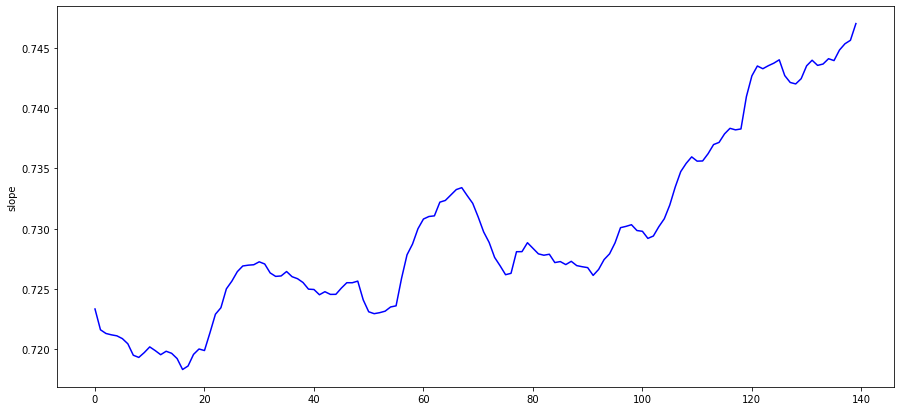

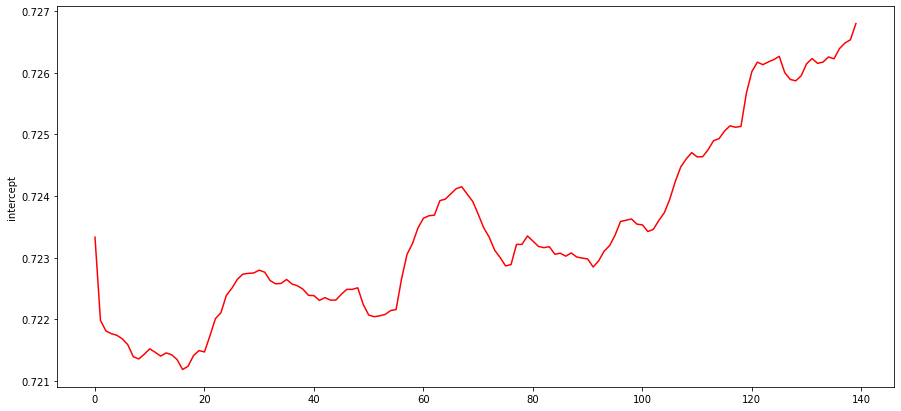

In [21]:
plt.figure(figsize =(15,7))
plt.plot(slope, c='b')
plt.ylabel('slope')
plt.figure(figsize =(15,7))
plt.plot(intercept,c='r')
plt.ylabel('intercept')

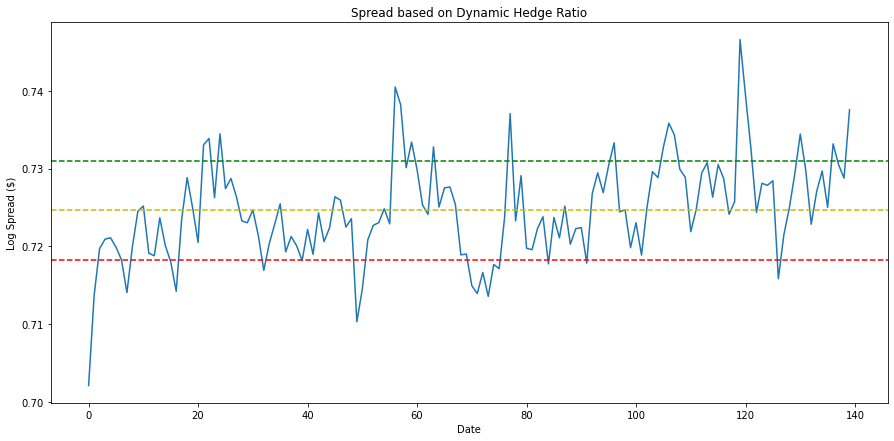

In [12]:
spread_ts = np.log(mtchCurrent['Close'].values) - slope * np.log(amgnCurrent['Close'].values)
plt.figure(figsize = (15,7))
plt.plot(spread_ts)
plt.title("Spread based on Dynamic Hedge Ratio")
plt.ylabel("Log Spread ($)")
plt.xlabel("Date")
spread_avg = spread_ts.mean()
spread_sd = spread_ts.std()
upper_threshold = spread_avg + spread_sd
lower_threshold = spread_avg - spread_sd
plt.axhline(upper_threshold, linestyle = 'dashed', color = 'g')
plt.axhline(spread_avg, linestyle = 'dashed', color = 'y')
plt.axhline(lower_threshold, linestyle = 'dashed', color = 'r')